# Muhammad Hassan

## Iris Flower Classification

## Task 01 Beignner Level

### 1. Importing Libraries

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### 2. Importing dataset

In [23]:
df= pd.read_csv("C:/Users/Hassan Jutt/Downloads/Iris.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Information about dataset

In [24]:
df.shape

(150, 5)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [26]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [27]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [28]:
corelation_matrix = df.corr()
print(corelation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000


C:\Users\Hassan Jutt\AppData\Local\Temp\ipykernel_13940\995749295.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corelation_matrix = df.corr()


### 4. Visualizing the data

Text(0.5, 1.0, 'SepalLength vs SepalWidth')

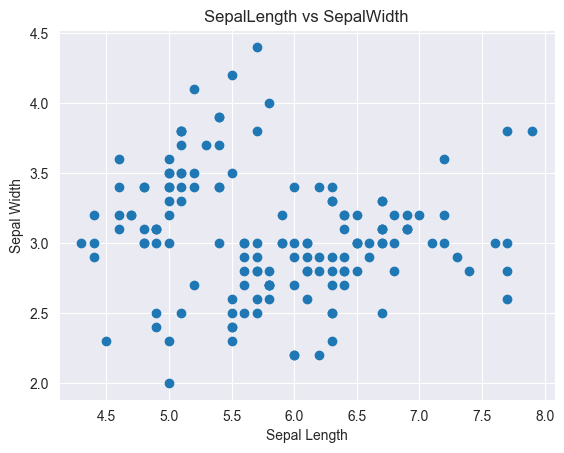

In [33]:
#Scatter plot
plt.scatter(df["SepalLengthCm"],df["SepalWidthCm"])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("SepalLength vs SepalWidth")

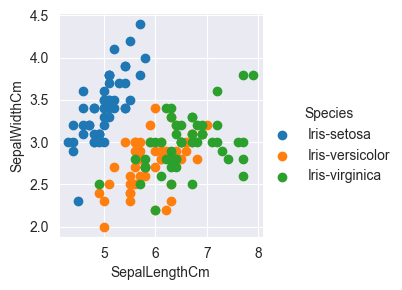

In [35]:
sns.FacetGrid(df,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()

<Axes: xlabel='Species', ylabel='count'>

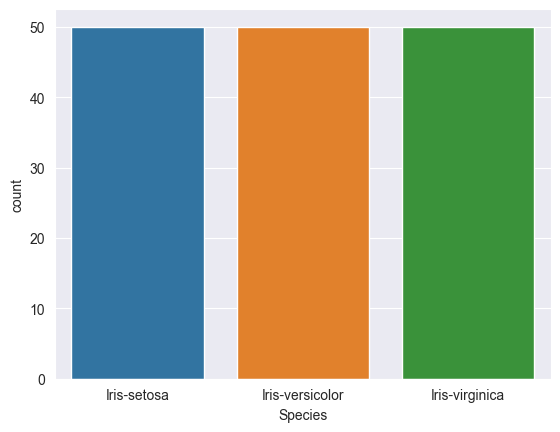

In [37]:
#Barplot for Species count in dataset
sns.countplot(x='Species',data = df)

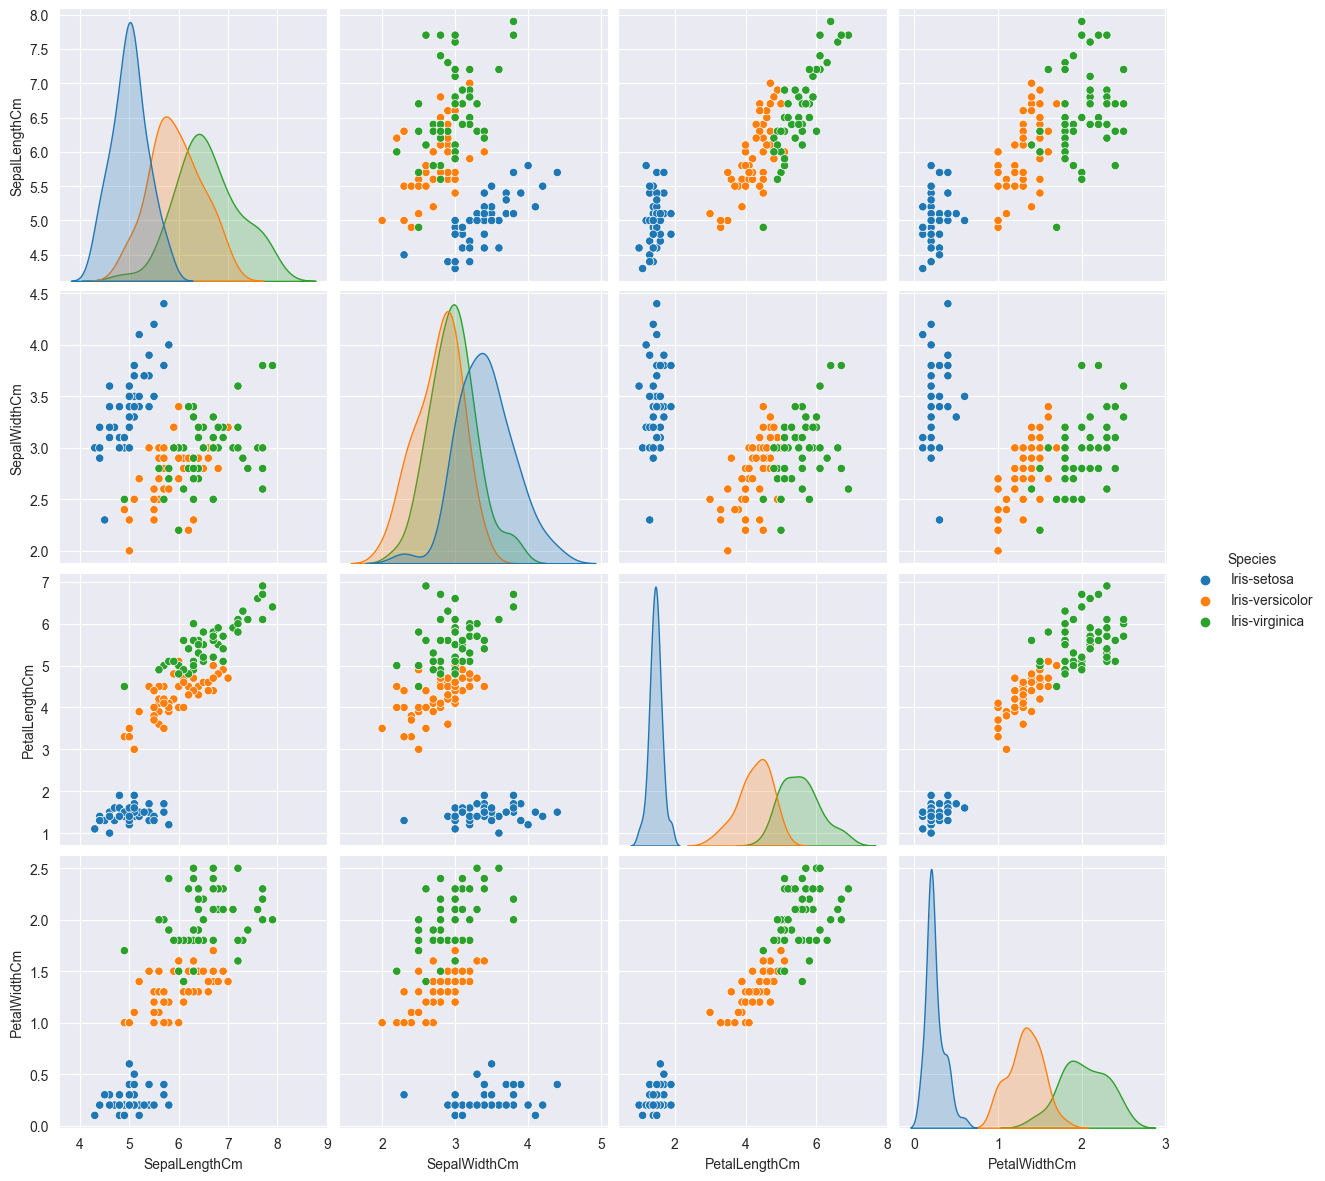

In [39]:
#Creating pairplot for dataset
sns.pairplot(hue ='Species',data=df,height=3)

C:\Users\Hassan Jutt\AppData\Local\Temp\ipykernel_13940\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

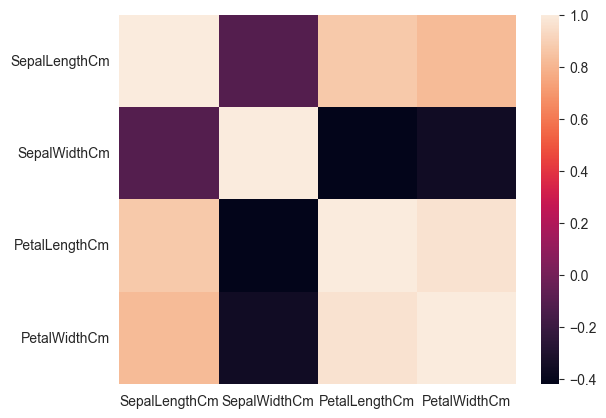

In [40]:
sns.heatmap(df.corr())

### 5. Splitng the datset in Train and Test

In [42]:
X_train, X_test, Y_train, Y_test= train_test_split(df.iloc[:,0:4],df.iloc[:,4],test_size=0.2,random_state=42)

### 6. KNN Classifier

In [58]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)
prediction=model.predict(X_test)
print('The accuracy of the KNN is',accuracy_score(prediction,Y_test))

The accuracy of the KNN is 1.0


In [59]:
#Classification Report of KNN classifier
report = classification_report(Y_test, prediction)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [60]:
#Confusion Matrix
cm = confusion_matrix(Y_test, prediction)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### 7. Decision Tree

In [61]:
# Initialize decision tree
model2 = DecisionTreeClassifier(criterion='gini')

# Train the decision tree classifiers
model2.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model2.predict(X_test)

# Print the accuracy scores
print("Accuracy of Decision tree:", accuracy_score(Y_test, y_pred))

Accuracy of Decision tree: 1.0


In [63]:
#Classification report for Decision Tree
report = classification_report(Y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [64]:
#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


### 8. Logistic Regression

In [67]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the accuracy scores
print("Accuracy of Logistic Regression: ", accuracy_score(Y_test, y_pred))

Accuracy of Logistic Regression 1.0


In [68]:
#Classification report for Decision Tree
report = classification_report(Y_test, y_pred)
print(report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [69]:
#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
